Norm of angle at time step of 42 is 1.199672242348801


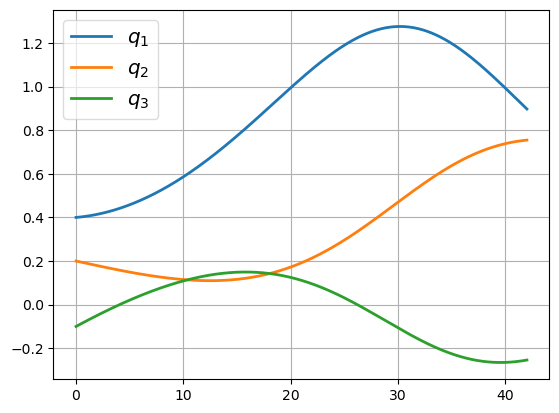

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def CRP(q, t):
    omegaDot = np.deg2rad(3) * np.array([np.sin(0.1*t), 0.01, np.cos(0.1*t)])
    q1, q2, q3 = q
    q_prime = np.array([[0, -q3, q2],
                        [q3, 0, -q1],
                        [-q2, q1, 0]])
    dy = 0.5 * (np.eye(3) + q_prime + np.outer(q, q)) @ omegaDot
    return dy

initialState = np.array([0.4, 0.2, -0.1])
tEnd = 42
step = 0.01
t = np.arange(0, tEnd + step, step)
sol = odeint(CRP, initialState, t)

norm = np.sqrt(sol[-1, 0]**2 + sol[-1, 1]**2 + sol[-1, 2]**2)
print(f"Norm of angle at time step of {tEnd} is {norm}")

plt.figure(1)
plt.plot(t, sol, linewidth=2)
plt.legend(['$q_{1}$', '$q_{2}$', '$q_{3}$'], loc='upper left', fontsize='x-large', fancybox=True, framealpha=0.7)
plt.grid(True)
plt.show()
